# Model for Cardiovascular (CVD) Risk Prediction 

## Cardiovascular Disease dataset

The dataset consists of 70,000 records of patients data, 11 features + target

In [205]:
import numpy as np
import pandas as pd

In [206]:
df = pd.read_csv('cardio_train.csv')

In [207]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [209]:
df.drop('id', axis=1, inplace=True)

In [210]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

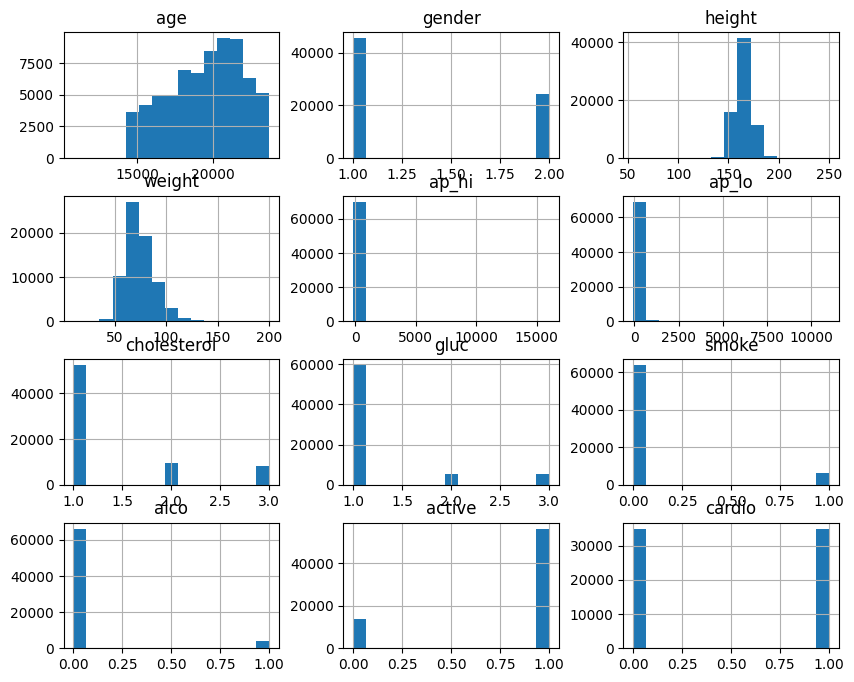

In [211]:
df.hist(bins=15, figsize=(10,8))

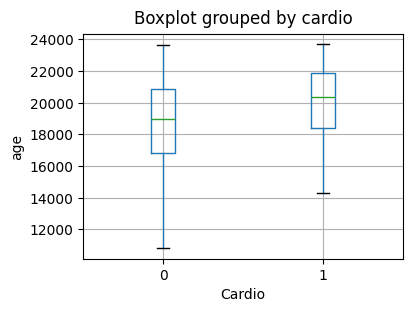

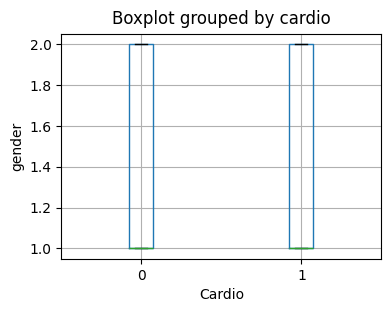

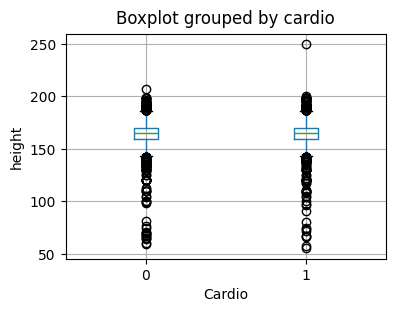

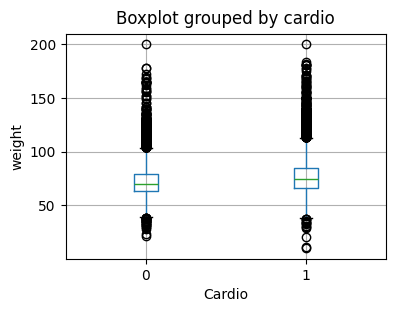

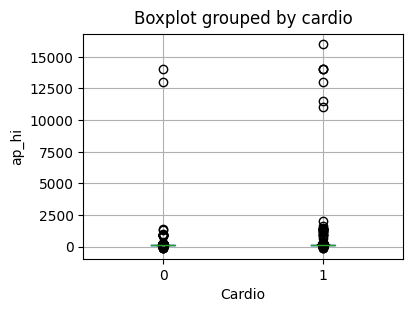

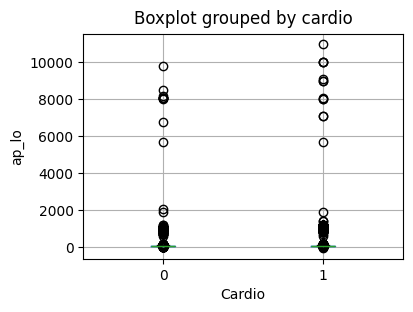

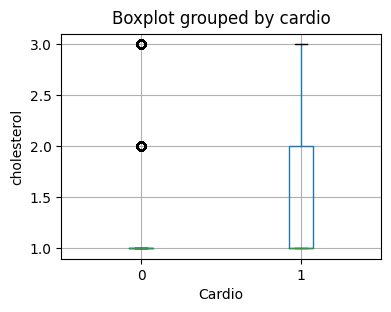

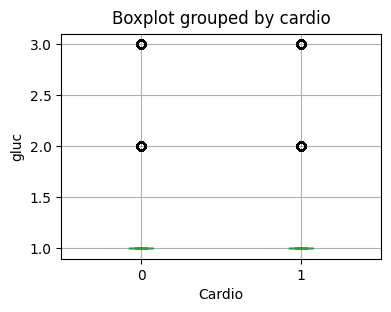

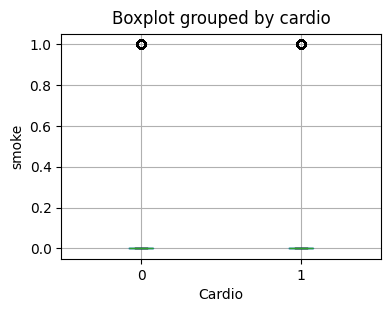

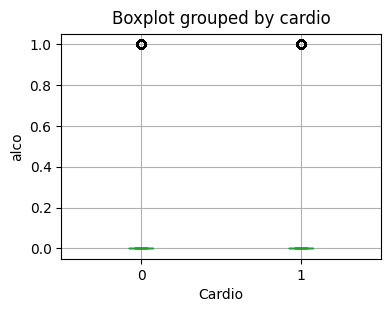

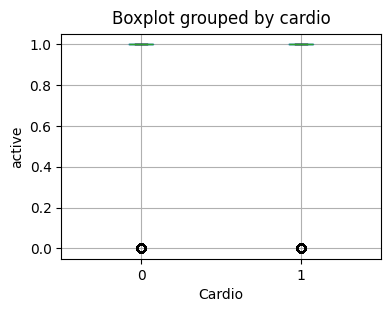

In [212]:
import matplotlib.pyplot as plt
for col in df.columns[:-1]:
  # Create a new figure for each boxplot
  df.boxplot(column=col, by='cardio', figsize=(4, 3))
  plt.title('')
  plt.xlabel("Cardio")
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

In [213]:
def remove_outliers(df, factor):
    for column in ['ap_hi', 'ap_lo', 'weight', 'height']:
        upper_lim = df[column].mean() + df[column].std() * factor
        lower_lim = df[column].mean() - df[column].std() * factor

        # Remove outliers
        df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]
        print(df.shape)
    return df



In [214]:
df_cleaned = remove_outliers(df.copy(), factor=2)

(69962, 12)
(69009, 12)
(65873, 12)
(63661, 12)


In [215]:
df[['ap_hi', 'ap_lo', 'weight', 'height']] = df_cleaned[['ap_hi', 'ap_lo', 'weight', 'height']]

In [216]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,20228,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,18857,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,17623,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,17474,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0
69996,22601,1,NaN,NaN,NaN,NaN,2,2,0,0,1,1
69997,19066,2,NaN,NaN,NaN,NaN,3,1,0,1,0,1
69998,22431,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1


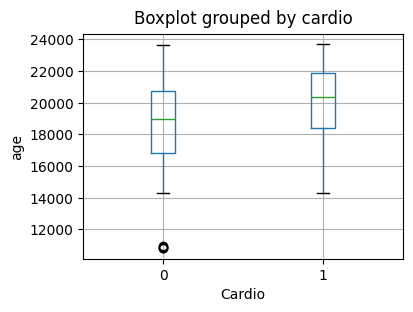

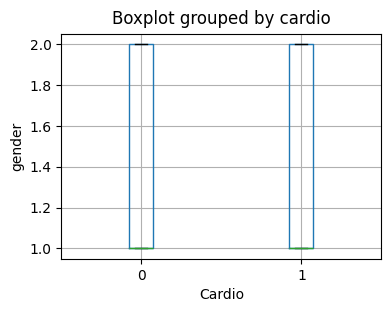

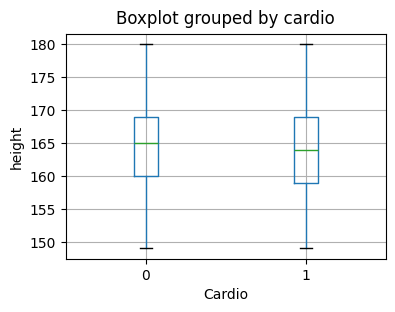

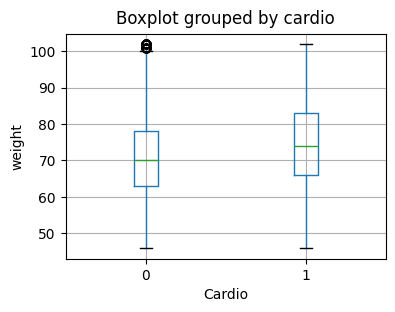

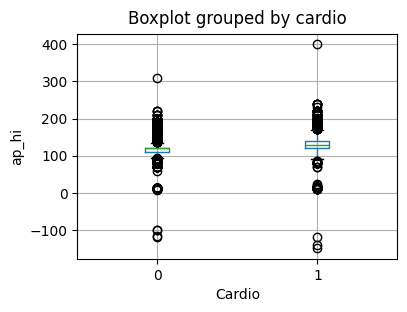

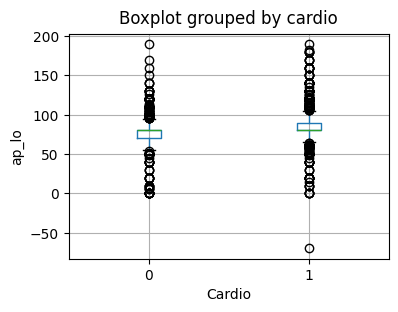

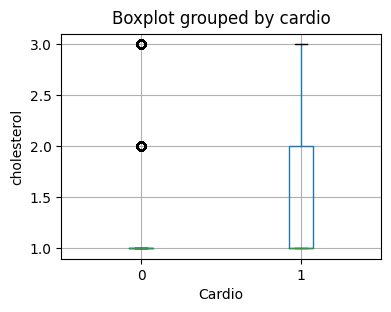

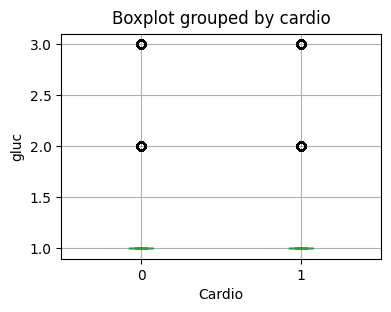

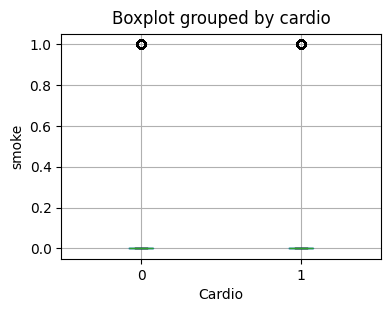

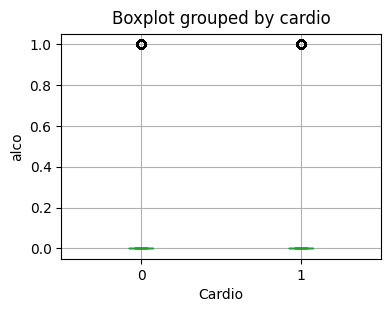

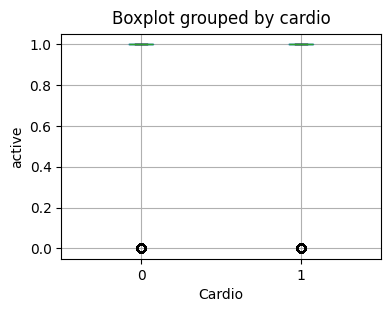

In [217]:
def plot_boxplots(df):
    for col in df.columns[:-1]:
      # Create a new figure for each boxplot
      df.boxplot(column=col, by='cardio', figsize=(4, 3))
      plt.title('')
      plt.xlabel("Cardio")
      plt.ylabel(col)
      plt.grid(True)
      plt.show()
        
plot_boxplots(df_cleaned)

In [218]:
df = df_cleaned

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63661 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63661 non-null  int64  
 1   gender       63661 non-null  int64  
 2   height       63661 non-null  int64  
 3   weight       63661 non-null  float64
 4   ap_hi        63661 non-null  int64  
 5   ap_lo        63661 non-null  int64  
 6   cholesterol  63661 non-null  int64  
 7   gluc         63661 non-null  int64  
 8   smoke        63661 non-null  int64  
 9   alco         63661 non-null  int64  
 10  active       63661 non-null  int64  
 11  cardio       63661 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 8.3 MB


In [220]:
df['cardio'].value_counts()

cardio
0    32629
1    31032
Name: count, dtype: int64

In [221]:
x = df.iloc[:, :-1]
y = df['cardio']

In [222]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [223]:
y.sample(5)

1453     0
8147     0
46119    0
2620     0
30769    0
Name: cardio, dtype: int64

Binning attributes age

Convert age from days to years and use bining method

In [224]:
# Convert age to years
df['age_year'] = df['age'] / 365

# Define bin edges and labels
bins = [30, 35, 40, 45, 50, 55, 60, 65]
labels = [0, 1, 2, 3, 4, 5, 6]

In [225]:
df['age_bin'] = pd.cut(df['age_year'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Convert continuous values into categorical values and apply bining methods

Mean Arterial Pressure (MAP) = (2 Diastollic Blood Pressure + Sistolic Blood Pressure)/3

In [226]:
df['MAP'] = (2 * df['ap_lo'] + df['ap_hi']) / 3

In [227]:
# Define bin edges and labels
bins = [70, 80, 90, 100, 110, 120]
labels = [1, 2, 3, 4, 5]

In [228]:
df['MAP_class'] = pd.cut(df['MAP'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

Body Mass Index (BMI) = weight (kg) / height² (m²)

In [229]:
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

In [230]:
# Define bin edges and labels
bins = [0, 15, 18.5, 25, 30, 35, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

In [231]:
df['BMI_class'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio   age_year 

In [232]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,age_bin,MAP,MAP_class,BMI,BMI_class
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,4,90.000000,3,21.967120,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,5,106.666667,4,34.927679,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,4,90.000000,3,23.507805,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,3,116.666667,5,28.710479,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,3,73.333333,1,23.011177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1,53.969863,4,103.333333,4,23.661439,2
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,5,103.333333,4,29.384757,3
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,4,93.333333,3,26.927438,3
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795,6,98.333333,3,27.099251,3


In [233]:
columns_to_drop = ['age', 'age_year', 'MAP', 'BMI', 'weight', 'height', 'ap_hi', 'ap_lo']
df = df.drop(columns_to_drop, axis=1)

In [234]:
# Define the desired order of columns
new_order = ['gender', 'age_bin', 'BMI_class', 'MAP_class', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

df = df[new_order]
print(df)

       gender age_bin BMI_class MAP_class  cholesterol  gluc  smoke  alco  \
0           2       4         2         3            1     1      0     0   
1           1       5         4         4            3     1      0     0   
2           1       4         2         3            3     1      0     0   
3           2       3         3         5            1     1      0     0   
4           1       3         2         1            1     1      0     0   
...       ...     ...       ...       ...          ...   ...    ...   ...   
69993       1       4         2         4            1     1      0     0   
69994       1       5         3         4            1     1      0     0   
69995       2       4         3         3            1     1      1     0   
69998       1       6         3         3            1     2      0     0   
69999       1       5         2         3            2     1      0     0   

       active  cardio  
0           1       0  
1           1       1  
2  

In [ ]:
import pandas as pd
from kmodes.kmodes import KModes

def kmodes_by_gender(data, gender):
  cost = []
  for num_clusters in range(1, 6):
      kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
      kmode.fit_predict(data)
      cost.append(kmode.cost_)

  plt.plot(range(1, 6), cost, marker='x', color='blue')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Cost')
  plt.title(f'Elbow Curve for {gender}')
  plt.show()

  # Add cluster labels to the data for this gender
  data['cluster'] = kmode.labels_
  return data

# Split the data by gender
female_data = df[df['gender'] == 1]
male_data = df[df['gender'] == 2]

# Select relevant categorical columns for clustering
male_features = male_data[:]
female_features = female_data[:]

# Perform KModes clustering for males and females
clustered_males = kmodes_by_gender(male_features.copy(), 'Male')
clustered_females = kmodes_by_gender(female_features.copy(), 'Female')

# Combine the clustered DataFrames
df_clustered = pd.concat([clustered_males, clustered_females])

/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 82525.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 82525.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 82525.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 82525.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 82525.0
Best run was number 1
Init: initializing centroids


/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/kamme/Documents/study/pythonProject/.venv/lib/python3.9/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4755, cost: 63158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3469, cost: 66430.0
Run 2, iteration: 2/100, moves: 15, cost: 66430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2520, cost: 66430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


In [236]:
df = df_clustered

In [237]:
# Define the desired order of columns
new_order = ['cluster','gender', 'age_bin', 'BMI_class', 'MAP_class', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Reorder the columns
df = df[new_order]
print(df)

       cluster  gender age_bin BMI_class MAP_class  cholesterol  gluc  smoke  \
0            0       2       4         2         3            1     1      0   
3            3       2       3         3         5            1     1      0   
7            2       2       6         3         4            3     3      0   
11           0       2       4         2         3            1     1      0   
12           0       2       2         2         3            1     1      0   
...        ...     ...     ...       ...       ...          ...   ...    ...   
69992        3       1       4         2         5            1     1      0   
69993        3       1       4         2         4            1     1      0   
69994        3       1       5         3         4            1     1      0   
69998        1       1       6         3         3            1     2      0   
69999        0       1       5         2         3            2     1      0   

       alco  active  cardio  
0        

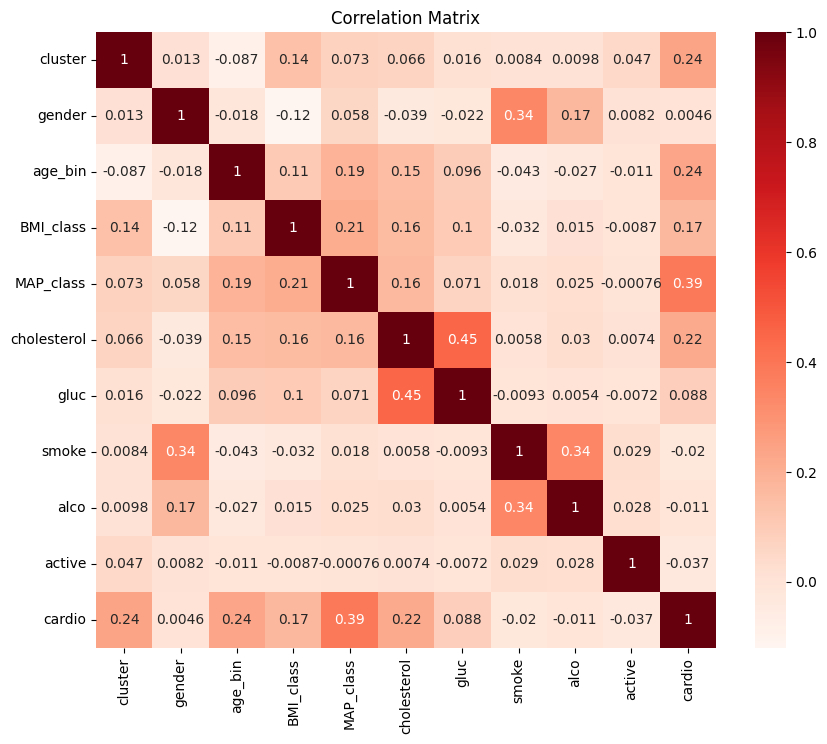

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

Split data 80:20

In [239]:
x = df.iloc[:,0:10]
y = df['cardio']

In [240]:
x.head()

,cluster,gender,age_bin,BMI_class,MAP_class,cholesterol,gluc,smoke,alco,active
0,0,2,4,2,3,1,1,0,0,1
3,3,2,3,3,5,1,1,0,0,1
7,2,2,6,3,4,3,3,0,0,1
11,0,2,4,2,3,1,1,0,0,1
12,0,2,2,2,3,1,1,0,0,0


In [241]:
y.sample(5)

32583    0
13398    0
68027    1
860      0
3057     1
Name: cardio, dtype: int64

In [242]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2)
# Split train and test into 80:20

In [243]:
X_train.shape

(50928, 10)

In [244]:
y_train.shape

(50928,)

In [245]:
x_test.shape

(12733, 10)

In [246]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set parameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Perform 10-fold cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=10,
    early_stopping_rounds=10,
    metrics={'auc'},
    as_pandas=True
)

# Find the best number of boosting rounds
best_num_boost_round = cv_results['test-auc-mean'].idxmax()

# Print the best number of boosting rounds and corresponding AUC
print(f"Best num_boost_round: {best_num_boost_round}")
print(f"Best test-auc-mean: {cv_results['test-auc-mean'].max()}")

# Train the final model with the best number of boosting rounds
best_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_round
)

# Make predictions on the test set
y_pred_probas = best_model.predict(dtest)

# Evaluate the model (optional)
from sklearn.metrics import roc_auc_score
y_pred_probas = best_model.predict(dtest)
auc_score = roc_auc_score(y_test, y_pred_probas)
print(f"Test AUC Score: {auc_score}")


Best num_boost_round: 99
Best test-auc-mean: 0.959982947091547
Test AUC Score: 0.9616044956967341


Confusion Matrix:
[[6369  250]
 [1177 4937]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6619
           1       0.95      0.81      0.87      6114

    accuracy                           0.89     12733
   macro avg       0.90      0.88      0.89     12733
weighted avg       0.90      0.89      0.89     12733



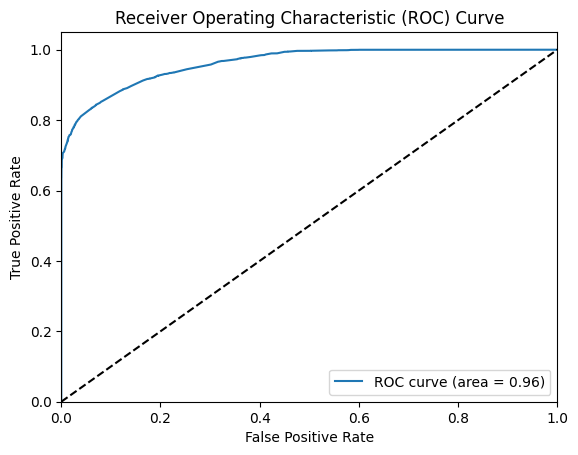

In [247]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for the positive class
y_pred_probas = best_model.predict(dtest)

# Convert probabilities to binary class predictions using a threshold
threshold = 0.5
y_pred_classes = (y_pred_probas >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC Curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [259]:
# Get prediction probabilities
y_pred_proba = best_model.predict(dtest)

# Extract confidence scores (assuming binary classification)
confidence_scores = y_pred_proba[:]

In [261]:
# confidence_scores = np.max(y_pred_proba, axis=1)

results_with_true = np.column_stack((y_test, y_pred_classes, confidence_scores))

print("\nTrue Class | Predicted Class | Confidence Score")
print("-----------|-----------------|----------------")
for row in results_with_true:
    print(f"{int(row[0])}          | {int(row[1])}              | {row[2]:.4f}")



True Class | Predicted Class | Confidence Score
-----------|-----------------|----------------
1          | 1              | 0.6338
1          | 1              | 0.6043
1          | 1              | 0.9987
0          | 0              | 0.1037
0          | 0              | 0.2353
0          | 0              | 0.3738
0          | 0              | 0.1782
0          | 0              | 0.2981
1          | 1              | 0.9994
1          | 1              | 0.9417
0          | 0              | 0.0890
1          | 1              | 0.9415
0          | 0              | 0.1976
0          | 0              | 0.1850
1          | 1              | 0.9981
1          | 1              | 0.6982
0          | 0              | 0.0022
1          | 1              | 0.9041
1          | 1              | 0.9268
1          | 1              | 0.9926
0          | 0              | 0.3829
0          | 0              | 0.0933
0          | 0              | 0.3007
1          | 1              | 0.9679
0          | 0  

In [262]:
# For a Pandas DataFrame output (more organized), you can do this:
import pandas as pd

results_df = pd.DataFrame(results_with_true, columns=['True Class', 'Predicted Class', 'Confidence Score'])
print("\nResults DataFrame:")
print(results_df)


Results DataFrame:
       True Class  Predicted Class  Confidence Score
0             1.0              1.0          0.633832
1             1.0              1.0          0.604271
2             1.0              1.0          0.998673
3             0.0              0.0          0.103698
4             0.0              0.0          0.235324
...           ...              ...               ...
12728         0.0              0.0          0.010722
12729         0.0              0.0          0.215860
12730         0.0              0.0          0.004912
12731         1.0              1.0          0.994977
12732         1.0              1.0          0.998064

[12733 rows x 3 columns]
